In [177]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math
tf.logging.set_verbosity(tf.logging.ERROR)  # or any {DEBUG, INFO, WARN, ERROR, FATAL}
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [178]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [179]:
data.test.cls = np.argmax(data.test.labels, axis=1)
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 10

In [180]:
def prameter_num():
    total_parameters = 0
    for variable in tf.trainable_variables():
        # shape is an array of tf.Dimension
        #print(variable)
        shape = variable.get_shape()
        #print(shape)
        #print(len(shape))
        variable_parameters = 1
        for dim in shape:
            #print(dim)
            variable_parameters *= dim.value
        #print(variable_parameters)
        total_parameters += variable_parameters
    return total_parameters

In [235]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

# layer_conv1
net = tf.layers.conv2d(inputs=x_image, name='layer_conv1', padding='same',
                       filters=6, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

print(net)

net = tf.layers.flatten(net)
print(net)

net = tf.layers.dense(inputs=net, name='layer_fc1',
                      units=128, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=net, name='layer_fc_out',
                      units=num_classes, activation=None)
print(logits)

y_pred = tf.nn.softmax(logits=logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits)
loss = tf.reduce_mean(cross_entropy)

opt = tf.train.AdamOptimizer(learning_rate=0.01)
optimizer = opt.minimize(loss)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

trainable_var_list = tf.trainable_variables()

par_num1 = prameter_num()

print("Total Parameters number = %s"  %par_num1)

Tensor("max_pooling2d/MaxPool:0", shape=(?, 14, 14, 6), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 1176), dtype=float32)
Tensor("layer_fc_out/BiasAdd:0", shape=(?, 10), dtype=float32)
Total Parameters number = 152102


In [236]:
train_batch_size = 64
n_batch = data.train.num_examples // train_batch_size

loss_list1 = []
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(1):
    for batch in range(n_batch):
        batch_xs, batch_ys = data.train.next_batch(train_batch_size)
        sess.run(optimizer, feed_dict={x:batch_xs, y_true:batch_ys})
    loss1 = sess.run(loss, feed_dict={x:data.test.images,y_true:data.test.labels})
    acc1 = sess.run(accuracy, feed_dict={x:data.test.images,y_true:data.test.labels})
    lTrain1 = sess.run(loss, feed_dict={x:batch_xs, y_true:batch_ys})
    aTrain1 = sess.run(accuracy, feed_dict={x:batch_xs, y_true:batch_ys})
    print("Epoch " + str(epoch) + " Testing Accuracy: " + str(acc1))

Epoch 0 Testing Accuracy: 0.9726


In [183]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

# layer_conv1
net = tf.layers.conv2d(inputs=x_image, name='layer_conv1', padding='same',
                       filters=2, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=8)

print(net)

net = tf.layers.flatten(net)
print(net)

net = tf.layers.dense(inputs=net, name='layer_fc1',
                      units=16, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=net, name='layer_fc_out',
                      units=num_classes, activation=None)
print(logits)

y_pred = tf.nn.softmax(logits=logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits)
loss = tf.reduce_mean(cross_entropy)

opt = tf.train.AdamOptimizer(learning_rate=0.01)
optimizer = opt.minimize(loss)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

trainable_var_list = tf.trainable_variables()

par_num2 = prameter_num()

print("Total Parameters number = %s"  %par_num2)

Tensor("max_pooling2d/MaxPool:0", shape=(?, 4, 4, 2), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 32), dtype=float32)
Tensor("layer_fc_out/BiasAdd:0", shape=(?, 10), dtype=float32)
Total Parameters number = 750


In [184]:
train_batch_size = 64
n_batch = data.train.num_examples // train_batch_size

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(1):
    for batch in range(n_batch):
        batch_xs, batch_ys = data.train.next_batch(train_batch_size)
        sess.run(optimizer, feed_dict={x:batch_xs, y_true:batch_ys})
    loss2 = sess.run(loss, feed_dict={x:data.test.images,y_true:data.test.labels})
    acc2 = sess.run(accuracy, feed_dict={x:data.test.images,y_true:data.test.labels})
    lTrain2 = sess.run(loss, feed_dict={x:batch_xs, y_true:batch_ys})
    aTrain2 = sess.run(accuracy, feed_dict={x:batch_xs, y_true:batch_ys})
    print("Epoch " + str(epoch) + " Testing Accuracy: " + str(acc2))

Epoch 0 Testing Accuracy: 0.8314


In [185]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

# layer_conv1
net = tf.layers.conv2d(inputs=x_image, name='layer_conv1', padding='same',
                       filters=1, kernel_size=3, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=4, strides=8)

print(net)

net = tf.layers.flatten(net)
print(net)

net = tf.layers.dense(inputs=net, name='layer_fc1',
                      units=8, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=net, name='layer_fc_out',
                      units=num_classes, activation=None)
print(logits)

y_pred = tf.nn.softmax(logits=logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits)
loss = tf.reduce_mean(cross_entropy)

opt = tf.train.AdamOptimizer(learning_rate=0.01)
optimizer = opt.minimize(loss)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

trainable_var_list = tf.trainable_variables()

par_num3 = prameter_num()

print("Total Parameters number = %s"  %par_num3)

Tensor("max_pooling2d/MaxPool:0", shape=(?, 4, 4, 1), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 16), dtype=float32)
Tensor("layer_fc_out/BiasAdd:0", shape=(?, 10), dtype=float32)
Total Parameters number = 236


In [186]:
train_batch_size = 64
n_batch = data.train.num_examples // train_batch_size

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(1):
    for batch in range(n_batch):
        batch_xs, batch_ys = data.train.next_batch(train_batch_size)
        sess.run(optimizer, feed_dict={x:batch_xs, y_true:batch_ys})
    loss3 = sess.run(loss, feed_dict={x:data.test.images,y_true:data.test.labels})
    acc3 = sess.run(accuracy, feed_dict={x:data.test.images,y_true:data.test.labels})
    lTrain3 = sess.run(loss, feed_dict={x:batch_xs, y_true:batch_ys})
    aTrain3 = sess.run(accuracy, feed_dict={x:batch_xs, y_true:batch_ys})
    print("Epoch " + str(epoch) + " Testing Accuracy: " + str(acc3))

Epoch 0 Testing Accuracy: 0.6617


In [187]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

# layer_conv1
net = tf.layers.conv2d(inputs=x_image, name='layer_conv1', padding='same',
                       filters=2, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=4, strides=4)

print(net)

net = tf.layers.flatten(net)
print(net)

net = tf.layers.dense(inputs=net, name='layer_fc1',
                      units=128, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=net, name='layer_fc_out',
                      units=num_classes, activation=None)
print(logits)

y_pred = tf.nn.softmax(logits=logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits)
loss = tf.reduce_mean(cross_entropy)

opt = tf.train.AdamOptimizer(learning_rate=0.01)
optimizer = opt.minimize(loss)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

trainable_var_list = tf.trainable_variables()

par_num4 = prameter_num()

print("Total Parameters number = %s"  %par_num4)

Tensor("max_pooling2d/MaxPool:0", shape=(?, 7, 7, 2), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 98), dtype=float32)
Tensor("layer_fc_out/BiasAdd:0", shape=(?, 10), dtype=float32)
Total Parameters number = 14014


In [188]:
train_batch_size = 64
n_batch = data.train.num_examples // train_batch_size

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(1):
    for batch in range(n_batch):
        batch_xs, batch_ys = data.train.next_batch(train_batch_size)
        sess.run(optimizer, feed_dict={x:batch_xs, y_true:batch_ys})
    loss4 = sess.run(loss, feed_dict={x:data.test.images,y_true:data.test.labels})
    acc4 = sess.run(accuracy, feed_dict={x:data.test.images,y_true:data.test.labels})
    lTrain4 = sess.run(loss, feed_dict={x:batch_xs, y_true:batch_ys})
    aTrain4 = sess.run(accuracy, feed_dict={x:batch_xs, y_true:batch_ys})
    print("Epoch " + str(epoch) + " Testing Accuracy: " + str(acc4))

Epoch 0 Testing Accuracy: 0.9526


In [189]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

# layer_conv1
net = tf.layers.conv2d(inputs=x_image, name='layer_conv1', padding='same',
                       filters=2, kernel_size=3, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=8, strides=8)

print(net)

net = tf.layers.flatten(net)
print(net)

net = tf.layers.dense(inputs=net, name='layer_fc1',
                      units=16, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=net, name='layer_fc_out',
                      units=num_classes, activation=None)
print(logits)

y_pred = tf.nn.softmax(logits=logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits)
loss = tf.reduce_mean(cross_entropy)

opt = tf.train.AdamOptimizer(learning_rate=0.01)
optimizer = opt.minimize(loss)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

trainable_var_list = tf.trainable_variables()

par_num5 = prameter_num()

print("Total Parameters number = %s"  %par_num5)

Tensor("max_pooling2d/MaxPool:0", shape=(?, 3, 3, 2), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 18), dtype=float32)
Tensor("layer_fc_out/BiasAdd:0", shape=(?, 10), dtype=float32)
Total Parameters number = 494


In [190]:
train_batch_size = 64
n_batch = data.train.num_examples // train_batch_size

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(1):
    for batch in range(n_batch):
        batch_xs, batch_ys = data.train.next_batch(train_batch_size)
        sess.run(optimizer, feed_dict={x:batch_xs, y_true:batch_ys})
    loss5 = sess.run(loss, feed_dict={x:data.test.images,y_true:data.test.labels})
    acc5 = sess.run(accuracy, feed_dict={x:data.test.images,y_true:data.test.labels})
    lTrain5 = sess.run(loss, feed_dict={x:batch_xs, y_true:batch_ys})
    aTrain5 = sess.run(accuracy, feed_dict={x:batch_xs, y_true:batch_ys})
    print("Epoch " + str(epoch) + " Testing Accuracy: " + str(acc5))

Epoch 0 Testing Accuracy: 0.8124


In [191]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

# layer_conv1
net = tf.layers.conv2d(inputs=x_image, name='layer_conv1', padding='same',
                       filters=8, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

print(net)

net = tf.layers.flatten(net)
print(net)

net = tf.layers.dense(inputs=net, name='layer_fc1',
                      units=64, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=net, name='layer_fc_out',
                      units=num_classes, activation=None)
print(logits)

y_pred = tf.nn.softmax(logits=logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits)
loss = tf.reduce_mean(cross_entropy)

opt = tf.train.AdamOptimizer(learning_rate=0.01)
optimizer = opt.minimize(loss)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

trainable_var_list = tf.trainable_variables()

par_num6 = prameter_num()

print("Total Parameters number = %s"  %par_num6)

Tensor("max_pooling2d/MaxPool:0", shape=(?, 14, 14, 8), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 1568), dtype=float32)
Tensor("layer_fc_out/BiasAdd:0", shape=(?, 10), dtype=float32)
Total Parameters number = 101274


In [192]:
train_batch_size = 64
n_batch = data.train.num_examples // train_batch_size

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(1):
    for batch in range(n_batch):
        batch_xs, batch_ys = data.train.next_batch(train_batch_size)
        sess.run(optimizer, feed_dict={x:batch_xs, y_true:batch_ys})
    loss6 = sess.run(loss, feed_dict={x:data.test.images,y_true:data.test.labels})
    acc6 = sess.run(accuracy, feed_dict={x:data.test.images,y_true:data.test.labels})
    lTrain6 = sess.run(loss, feed_dict={x:batch_xs, y_true:batch_ys})
    aTrain6 = sess.run(accuracy, feed_dict={x:batch_xs, y_true:batch_ys})
    print("Epoch " + str(epoch) + " Testing Accuracy: " + str(acc6))

Epoch 0 Testing Accuracy: 0.9807


In [230]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

# layer_conv1
net = tf.layers.conv2d(inputs=x_image, name='layer_conv1', padding='same',
                       filters=26, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

print(net)

# layer_conv2
net = tf.layers.conv2d(inputs=net, name='layer_conv2', padding='same',
                       filters=16, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)
print(net)

net = tf.layers.flatten(net)
print(net)

net = tf.layers.dense(inputs=net, name='layer_fc1',
                      units=64, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=net, name='layer_fc_out',
                      units=num_classes, activation=None)
print(logits)

y_pred = tf.nn.softmax(logits=logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits)
loss = tf.reduce_mean(cross_entropy)

opt = tf.train.AdamOptimizer(learning_rate=0.01)
optimizer = opt.minimize(loss)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

trainable_var_list = tf.trainable_variables()

par_num7 = prameter_num()

print("Total Parameters number = %s"  %par_num7)

Tensor("max_pooling2d/MaxPool:0", shape=(?, 14, 14, 26), dtype=float32)
Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 7, 7, 16), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 784), dtype=float32)
Tensor("layer_fc_out/BiasAdd:0", shape=(?, 10), dtype=float32)
Total Parameters number = 61982


In [231]:
train_batch_size = 64
n_batch = data.train.num_examples // train_batch_size

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(1):
    for batch in range(n_batch):
        batch_xs, batch_ys = data.train.next_batch(train_batch_size)
        sess.run(optimizer, feed_dict={x:batch_xs, y_true:batch_ys})
    loss7 = sess.run(loss, feed_dict={x:data.test.images,y_true:data.test.labels})
    acc7 = sess.run(accuracy, feed_dict={x:data.test.images,y_true:data.test.labels})
    lTrain7 = sess.run(loss, feed_dict={x:batch_xs, y_true:batch_ys})
    aTrain7 = sess.run(accuracy, feed_dict={x:batch_xs, y_true:batch_ys})
    print("Epoch " + str(epoch) + " Testing Accuracy: " + str(acc7))

Epoch 0 Testing Accuracy: 0.9795


In [221]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

# layer_conv1
net = tf.layers.conv2d(inputs=x_image, name='layer_conv1', padding='same',
                       filters=4, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=4, strides=2)

print(net)

net = tf.layers.flatten(net)
print(net)

net = tf.layers.dense(inputs=net, name='layer_fc1',
                      units=32, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=net, name='layer_fc_out',
                      units=num_classes, activation=None)
print(logits)

y_pred = tf.nn.softmax(logits=logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits)
loss = tf.reduce_mean(cross_entropy)

opt = tf.train.AdamOptimizer(learning_rate=0.01)
optimizer = opt.minimize(loss)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

trainable_var_list = tf.trainable_variables()

par_num8 = prameter_num()

print("Total Parameters number = %s"  %par_num8)

Tensor("max_pooling2d/MaxPool:0", shape=(?, 13, 13, 4), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 676), dtype=float32)
Tensor("layer_fc_out/BiasAdd:0", shape=(?, 10), dtype=float32)
Total Parameters number = 22098


In [222]:
train_batch_size = 64
n_batch = data.train.num_examples // train_batch_size

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(1):
    for batch in range(n_batch):
        batch_xs, batch_ys = data.train.next_batch(train_batch_size)
        sess.run(optimizer, feed_dict={x:batch_xs, y_true:batch_ys})
    loss8 = sess.run(loss, feed_dict={x:data.test.images,y_true:data.test.labels})
    acc8 = sess.run(accuracy, feed_dict={x:data.test.images,y_true:data.test.labels})
    lTrain8 = sess.run(loss, feed_dict={x:batch_xs, y_true:batch_ys})
    aTrain8 = sess.run(accuracy, feed_dict={x:batch_xs, y_true:batch_ys})
    print("Epoch " + str(epoch) + " Testing Accuracy: " + str(acc8))

Epoch 0 Testing Accuracy: 0.9616


In [197]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

# layer_conv1
net = tf.layers.conv2d(inputs=x_image, name='layer_conv1', padding='same',
                       filters=4, kernel_size=3, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

print(net)

# layer_conv2
net = tf.layers.conv2d(inputs=net, name='layer_conv2', padding='same',
                       filters=16, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)
print(net)

net = tf.layers.flatten(net)
print(net)

net = tf.layers.dense(inputs=net, name='layer_fc1',
                      units=8, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=net, name='layer_fc_out',
                      units=num_classes, activation=None)
print(logits)

y_pred = tf.nn.softmax(logits=logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits)
loss = tf.reduce_mean(cross_entropy)

opt = tf.train.AdamOptimizer(learning_rate=0.01)
optimizer = opt.minimize(loss)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

trainable_var_list = tf.trainable_variables()

par_num9 = prameter_num()

print("Total Parameters number = %s"  %par_num9)

Tensor("max_pooling2d/MaxPool:0", shape=(?, 14, 14, 4), dtype=float32)
Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 7, 7, 16), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 784), dtype=float32)
Tensor("layer_fc_out/BiasAdd:0", shape=(?, 10), dtype=float32)
Total Parameters number = 8026


In [198]:
train_batch_size = 64
n_batch = data.train.num_examples // train_batch_size

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(1):
    for batch in range(n_batch):
        batch_xs, batch_ys = data.train.next_batch(train_batch_size)
        sess.run(optimizer, feed_dict={x:batch_xs, y_true:batch_ys})
    loss9 = sess.run(loss, feed_dict={x:data.test.images,y_true:data.test.labels})
    acc9 = sess.run(accuracy, feed_dict={x:data.test.images,y_true:data.test.labels})
    lTrain9 = sess.run(loss, feed_dict={x:batch_xs, y_true:batch_ys})
    aTrain9 = sess.run(accuracy, feed_dict={x:batch_xs, y_true:batch_ys})
    print("Epoch " + str(epoch) + " Testing Accuracy: " + str(acc9))

Epoch 0 Testing Accuracy: 0.9738


In [227]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

# layer_conv1
net = tf.layers.conv2d(inputs=x_image, name='layer_conv1', padding='same',
                       filters=16, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

# layer_conv2
net = tf.layers.conv2d(inputs=net, name='layer_conv2', padding='same',
                       filters=36, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)
print(net)

net = tf.layers.flatten(net)
print(net)

net = tf.layers.dense(inputs=net, name='layer_fc1',
                      units=128, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=net, name='layer_fc_out',
                      units=num_classes, activation=None)
print(logits)

y_pred = tf.nn.softmax(logits=logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits)
loss = tf.reduce_mean(cross_entropy)

opt = tf.train.AdamOptimizer(learning_rate=0.01)
optimizer = opt.minimize(loss)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

trainable_var_list = tf.trainable_variables()

par_num10 = prameter_num()

print("Total Parameters number = %s"  %par_num10)


Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 7, 7, 36), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 1764), dtype=float32)
Tensor("layer_fc_out/BiasAdd:0", shape=(?, 10), dtype=float32)
Total Parameters number = 242062


In [228]:
train_batch_size = 64
n_batch = data.train.num_examples // train_batch_size

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(1):
    for batch in range(n_batch):
        batch_xs, batch_ys = data.train.next_batch(train_batch_size)
        sess.run(optimizer, feed_dict={x:batch_xs, y_true:batch_ys})
    loss10 = sess.run(loss, feed_dict={x:data.test.images,y_true:data.test.labels})
    acc10 = sess.run(accuracy, feed_dict={x:data.test.images,y_true:data.test.labels})
    lTrain10 = sess.run(loss, feed_dict={x:batch_xs, y_true:batch_ys})
    aTrain10 = sess.run(accuracy, feed_dict={x:batch_xs, y_true:batch_ys})
    print("Epoch " + str(epoch) + " Testing Accuracy: " + str(acc10))

Epoch 0 Testing Accuracy: 0.9664


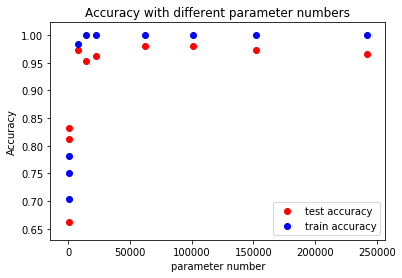

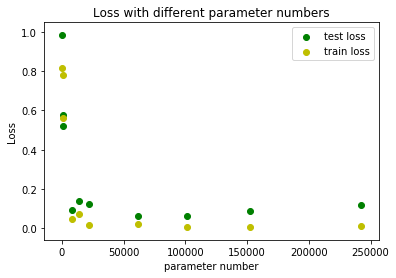

In [237]:
para_num = [par_num1,par_num2,par_num3,par_num4,par_num5,par_num6,par_num7,par_num8,par_num9,par_num10]
acc = [acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8,acc9,acc10]
loss = [loss1,loss2,loss3,loss4,loss5,loss6,loss7,loss8,loss9,loss10]
acc_train = [aTrain1,aTrain2,aTrain3,aTrain4,aTrain5,aTrain6,aTrain7,aTrain8,aTrain9,aTrain10]
loss_train = [lTrain1,lTrain2,lTrain3,lTrain4,lTrain5,lTrain6,lTrain7,lTrain8,lTrain9,lTrain10]

plt.scatter(para_num,acc, c='r')
plt.scatter(para_num,acc_train, c='b')
plt.show
plt.title('Accuracy with different parameter numbers')
plt.xlabel('parameter number')
plt.ylabel('Accuracy')
plt.legend(('test accuracy','train accuracy'))

plt.pause(0.1)
plt.scatter(para_num,loss, c='g')
plt.scatter(para_num,loss_train,c='y')
plt.show
plt.title('Loss with different parameter numbers')
plt.xlabel('parameter number')
plt.ylabel('Loss')
plt.legend(('test loss','train loss'))

# plt.pause(0.1)
# plt.scatter(par_num8,acc8)
# plt.scatter(par_num8,aTrain8)
# plt.legend(('test accuracy','train accuracy'))